In [1]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [2]:
match = pd.read_csv("Match.csv")
match

,Unnamed: 0,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Umpire1,Umpire2,Reserve_umpire,Tv_umpire,Match_referee,Winner,Winner_runs,Winner_wickets,Method,Outcome
0,0,1000887,Australia,Pakistan,male,2017/01/13,2016/17,Pakistan in Australia ODI Series,1.0,"""Brisbane Cricket Ground",...,MD Martell,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,92.0,NaN,NaN,NaN
1,1,1000889,Australia,Pakistan,male,2017/01/15,2016/17,Pakistan in Australia ODI Series,2.0,Melbourne Cricket Ground,...,CB Gaffaney,P Wilson,SJ Nogajski,C Shamshuddin,JJ Crowe,Pakistan,NaN,6.0,NaN,NaN
2,2,1000891,Australia,Pakistan,male,2017/01/19,2016/17,Pakistan in Australia ODI Series,3.0,Western Australia Cricket Association Ground,...,SD Fry,C Shamshuddin,P Wilson,CB Gaffaney,JJ Crowe,Australia,NaN,7.0,NaN,NaN
3,3,1000893,Australia,Pakistan,male,2017/01/22,2016/17,Pakistan in Australia ODI Series,4.0,Sydney Cricket Ground,...,CB Gaffaney,MD Martell,P Wilson,C Shamshuddin,JJ Crowe,Australia,86.0,NaN,NaN,NaN
4,4,1000895,Australia,Pakistan,male,2017/01/26,2016/17,Pakistan in Australia ODI Series,5.0,Adelaide Oval,...,SD Fry,C Shamshuddin,SJ Nogajski,CB Gaffaney,JJ Crowe,Australia,57.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",...,AJ Neill,IN Ramage,R Black,NaN,DT Jukes,Afghanistan,39.0,NaN,NaN,NaN
1947,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",...,AJ Neill,C Shamshuddin,R Black,NaN,DT Jukes,Afghanistan,79.0,NaN,NaN,NaN
1948,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",...,R Black,C Shamshuddin,AJ Neill,NaN,DT Jukes,Ireland,12.0,NaN,NaN,NaN
1949,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",...,DA Haggo,M Hawthorne,AJT Dowdalls,NaN,GF Labrooy,Scotland,98.0,NaN,NaN,NaN


In [3]:
PlayerPerformance = pd.read_csv("PlayerPerformance.csv")
PlayerPerformance

,Unnamed: 0,Match_id,Players_1,Players_2,Players_3,Players_4,Players_5,Players_6,Players_7,Players_8,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,0,1004261,G Malla,AK Mandal,S Vesawkar,P Khadka,Sagar Pun,R Rijal,B Bhandari,Sompal Kami,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,1,1004269,C Carter,KD Shah,Babar Hayat,Nizakat Khan,Anshuman Rath,Tanwir Afzal,Nadeem Ahmed,Aizaz Khan,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,2,1004283,KJ Coetzer,CD Wallace,CS MacLeod,MH Cross,RD Berrington,PL Mommsen,CD de Lange,SM Sharif,...,Aizaz Khan,Babar Hayat,Anshuman Rath,Ehsan Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed,-,-,-
3,3,1004285,KJ Coetzer,MH Cross,CS MacLeod,MA Leask,RD Berrington,CD de Lange,CD Wallace,SM Sharif,...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
4,4,1007649,PJ Moor,CJ Chibhabha,H Masakadza,CR Ervine,V Sibanda,Sikandar Raza,E Chigumbura,R Mutumbami,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900,997961,Mohammad Shahzad,Javed Ahmadi,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Dawlat Zadran,...,EC Joyce,J Anderson,SW Poynter,KJ O'Brien,PR Stirling,AR McBrine,GH Dockrell,BJ McCarthy,TJ Murtagh,PKD Chase
1901,1901,997965,Mohammad Shahzad,Noor Ali Zadran,Rahmat Shah,Samiullah Shenwari,Asghar Stanikzai,Najibullah Zadran,Mohammad Nabi,Rashid Khan,...,EC Joyce,SP Terry,SW Poynter,KJ O'Brien,PR Stirling,GC Wilson,AR McBrine,BJ McCarthy,TJ Murtagh,PKD Chase
1902,1902,997967,WTS Porterfield,EC Joyce,SP Terry,GC Wilson,KJ O'Brien,PR Stirling,SW Poynter,TJ Murtagh,...,Javed Ahmadi,Rahmat Shah,Gulbadin Naib,Asghar Stanikzai,Mohammad Nabi,Najibullah Zadran,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,Yamin Ahmadzai
1903,1903,997993,KJ Coetzer,CD Wallace,CS MacLeod,PL Mommsen,MA Leask,RD Berrington,CD de Lange,JH Davey,...,L Sreekumar,Mohammad Shahzad (2),Shaiman Anwar,Muhammad Usman,Rameez Shahzad,Mohammad Naveed,Krishna Chandran,Amjad Javed,Saqlain Haider,Ahmed Raza


In [4]:
matches=pd.merge(match,PlayerPerformance,on="Match_id")
matches

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Anshuman Rath,Ehsan Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed,-,-,-
3,15,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
4,16,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1946,997961,Ireland,Afghanistan,male,2016/07/12,2016,Afghanistan in Ireland ODI Series,2.0,"""Civil Service Cricket Club",...,EC Joyce,J Anderson,SW Poynter,KJ O'Brien,PR Stirling,AR McBrine,GH Dockrell,BJ McCarthy,TJ Murtagh,PKD Chase
1901,1947,997965,Ireland,Afghanistan,male,2016/07/17,2016,Afghanistan in Ireland ODI Series,4.0,"""Civil Service Cricket Club",...,EC Joyce,SP Terry,SW Poynter,KJ O'Brien,PR Stirling,GC Wilson,AR McBrine,BJ McCarthy,TJ Murtagh,PKD Chase
1902,1948,997967,Ireland,Afghanistan,male,2016/07/19,2016,Afghanistan in Ireland ODI Series,5.0,"""Civil Service Cricket Club",...,Javed Ahmadi,Rahmat Shah,Gulbadin Naib,Asghar Stanikzai,Mohammad Nabi,Najibullah Zadran,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,Yamin Ahmadzai
1903,1949,997993,Scotland,United Arab Emirates,male,2016/08/14,2016,"""ICC World Cricket League Championship",26.0,"""Grange Cricket Club Ground",...,L Sreekumar,Mohammad Shahzad (2),Shaiman Anwar,Muhammad Usman,Rameez Shahzad,Mohammad Naveed,Krishna Chandran,Amjad Javed,Saqlain Haider,Ahmed Raza


In [5]:
matches.info()
matches.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0_x        1905 non-null   int64  
 1   Match_id            1905 non-null   int64  
 2   Team1               1905 non-null   object 
 3   Team2               1905 non-null   object 
 4   Gender              1905 non-null   object 
 5   Date                1905 non-null   object 
 6   Season              1905 non-null   object 
 7   Series/Competition  1877 non-null   object 
 8   Match_number        1663 non-null   float64
 9   Venue               1905 non-null   object 
 10  City                1627 non-null   object 
 11  Neutral_venue       511 non-null    object 
 12  Toss_winner         1905 non-null   object 
 13  Toss_decision       1905 non-null   object 
 14  Player_of_match     1801 non-null   object 
 15  Umpire1             1905 non-null   object 
 16  Umpire

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Anshuman Rath,Ehsan Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed,-,-,-
3,15,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
4,16,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-


In [6]:
matches.head(7)

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,Netherlands,Nepal,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,Kenya,Hong Kong,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Anshuman Rath,Ehsan Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed,-,-,-
3,15,1004285,Scotland,Hong Kong,male,2016/09/10,2016,Hong Kong in Scotland ODI Series,2.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Nizakat Khan,Anshuman Rath,Ehsan Khan,Shahid Wasif,Waqas Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed
4,16,1007649,Zimbabwe,India,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
5,17,1007651,Zimbabwe,India,male,2016/06/13,2016,India in Zimbabwe ODI Series,2.0,Harare Sports Club,...,KK Nair,AT Rayudu,MK Pandey,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-
6,18,1007653,Zimbabwe,India,male,2016/06/15,2016,India in Zimbabwe ODI Series,3.0,Harare Sports Club,...,FY Fazal,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-,-,-


In [7]:
matches[pd.isnull(matches['Winner'])]
#find all NaN values in winner column, so that we update this as draw

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
2,14,1004283,Scotland,Hong Kong,male,2016/09/08,2016,Hong Kong in Scotland ODI Series,1.0,"""Grange Cricket Club Ground",...,Aizaz Khan,Babar Hayat,Anshuman Rath,Ehsan Khan,Tanwir Afzal,Nadeem Ahmed,Tanveer Ahmed,-,-,-
19,31,1022349,Australia,New Zealand,male,2017/06/02,2017,ICC Champions Trophy,2.0,Edgbaston,...,AJ Finch,SPD Smith,MC Henriques,MA Starc,JR Hazlewood,PJ Cummins,JW Hastings,TM Head,-,-
22,34,1022355,Australia,Bangladesh,male,2017/06/05,2017,ICC Champions Trophy,5.0,Kennington Oval,...,AJ Finch,SPD Smith,MA Starc,JR Hazlewood,PJ Cummins,TM Head,MC Henriques,A Zampa,GJ Maxwell,-
96,109,1059712,Zimbabwe,West Indies,male,2016/11/19,2016/17,Zimbabwe Tri-Nation Series,3.0,Queens Sports Club,...,KC Brathwaite,E Lewis,SD Hope,R Powell,JO Holder,CR Brathwaite,JL Carter,AR Nurse,ST Gabriel,SJ Benn
347,363,225245,England,Pakistan,male,2006/08/30,2006,NatWest Series,1.0,Sophia Gardens,...,Mohammad Hafeez,Younis Khan,Shoaib Akhtar,Mohammad Asif,Naved-ul-Hasan,Abdul Razzaq,Shahid Afridi,-,-,-
374,390,237242,New Zealand,West Indies,male,2006/02/16,2005/06,NaN,NaN,Eden Park,...,SP Fleming,NJ Astle,SB Styris,CL Cairns,PG Fulton,HJH Marshall,BB McCullum,JEC Franklin,SE Bond,JS Patel
402,419,239912,West Indies,Zimbabwe,male,2006/05/13,2006,Zimbabwe in West Indies ODI Series,6.0,"""Queen's Park Oval",...,V Sibanda,HP Rinke,BRM Taylor,T Mupariwa,AJ Ireland,KO Meth,GM Strydom,RS Higgins,P Utseya,-
413,430,247461,Ireland,Zimbabwe,male,2007/03/15,2006/07,ICC World Cup,5.0,"""Sabina Park",...,V Sibanda,CJ Chibhabha,SC Williams,S Matsikenyeri,E Chigumbura,BRM Taylor,GB Brent,P Utseya,CB Mpofu,EC Rainsford
505,523,256608,Australia,India,male,2006/09/16,2006/07,DLF Cup,3.0,Kinrara Academy Oval,...,SR Tendulkar,IK Pathan,V Sehwag,SK Raina,Yuvraj Singh,AB Agarkar,MM Patel,RP Singh,Harbhajan Singh,-
556,575,291359,Australia,India,male,2008/02/03,2007/08,Commonwealth Bank Series,1.0,"""Brisbane Cricket Ground",...,JR Hopes,MJ Clarke,RT Ponting,A Symonds,B Lee,NW Bracken,AA Noffke,MG Johnson,-,-


In [8]:
matches['Winner'].fillna('Draw', inplace=True)

In [9]:
matches.loc[1471,'Winner']

'Draw'

In [10]:
matches.replace(['Australia', 'Scotland', 'Papua New Guinea', 'Netherlands',
       'Kenya', 'Zimbabwe', 'New Zealand', 'England', 'South Africa',
       'India', 'Pakistan', 'Bangladesh', 'Adelaide Strikers',
       'Perth Scorchers', 'Sydney Thunder', 'Brisbane Heat',
       'Sydney Sixers', 'Melbourne Stars', 'Hong Kong', 'West Indies',
       'Ireland', 'Afghanistan', 'Sri Lanka', 'Malaysia', 'Denmark',
       'Bermuda', 'United States of America', 'Italy', 'Japan',
       'United Arab Emirates', 'Thailand', 'Rising Pune Supergiant',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Delhi Daredevils', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Nigeria', 'Ghana', 'Botswana',
       'Sierra Leone', 'Tanzania', 'Qatar', 'Bahrain',
       'Melbourne Renegades', 'Rajasthan Royals', 'Chennai Super Kings',
       'Hobart Hurricanes', 'Delhi Capitals', 'Canada', 'Africa XI',
       'Deccan Chargers', 'Nepal', 'Argentina', 'Cayman Islands',
       'Pune Warriors', 'Singapore', 'Bhutan', 'Samoa', 'Belgium', 'Oman',
       'Kuwait', 'Jersey', 'China', 'South Korea', 'Uganda', 'Namibia',
       'Fiji', 'Norway', 'Guernsey', 'Suriname',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Zambia', 'Asia XI',
       'Kochi Tuskers Kerala', 'Vanuatu', 'Maldives', 'Saudi Arabia' ]
                ,['Aus','Sco','PNG','Neth','ken','Zim','NZ','Eng','SA','Ind','Pak','Ban','AS','PS','ST','BH','SS','MS','HK','WI','Ire','Afg',
                 'SirL','Mal','Den','Ber','USA','IT','Ja','UAE','Thai','RPS','MI','KKR','KXIP','DD','RCB','Srh','Nig','Gh','Bot','SL',
                 'Tan','Qa','Bahra','MR','RR','CSK','HH','DC','Can','Africa XI','DC','Nep','Arg','CI','PW','Singa','Bhu','Samoa',
                 'Bel','Oman','Kuw','Jer','China','SK','Ug','Nam','Fi','Nor','Gue','Suri','RPS','GL','Zam','Asia XI',
                 'KTK','Vanua','Mald','Saudi'],inplace=True)


matches.head(2)

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,Neth,Nep,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,ken,HK,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch


In [11]:
encode = {'Team1': {'Aus':1,'Sco':2,'PNG':3,'Neth':4,'ken':5,'Zim':6,'NZ':7,'Eng':8,'SA':9,'Ind':10,'Pak':11,'Ban':12,'AS':12,'PS':13,'ST':14,'BH':15,'SS':16,'MS':17,'HK':18,'WI':19,'Ire':20,'Afg':21,
                 'SirL':22,'Mal':23,'Den':24,'Ber':25,'USA':26,'IT':27,'Ja':28,'UAE':29,'Thai':30,'RPS':31,'MI':32,'KKR':33,'KXIP':34,'DD':35,'RCB':36,'Srh':37,'Nig':38,'Gh':39,'Bot':40,'SL':41,
                 'Tan':42,'Qa':43,'Bahra':44,'MR':45,'RR':46,'CSK':47,'HH':48,'DC':49,'Can':50,'Africa XI':51,'DC':52,'Nep':53,'Arg':54,'CI':55,'PW':56,'Singa':57,'Bhu':57,'Samoa':58,
                 'Bel':59,'Oman':60,'Kuw':61,'Jer':62,'China':63,'SK':64,'Ug':65,'Nam':66,'Fi':67,'Nor':68,'Gue':69,'Suri':70,'RPS':71,'GL':72,'Zam':73,'Asia XI':74,
                 'KTK':75,'Vanua':76,'Mald':77,'Saudi':78},
          'Team2': {'Aus':1,'Sco':2,'PNG':3,'Neth':4,'ken':5,'Zim':6,'NZ':7,'Eng':8,'SA':9,'Ind':10,'Pak':11,'Ban':12,'AS':12,'PS':13,'ST':14,'BH':15,'SS':16,'MS':17,'HK':18,'WI':19,'Ire':20,'Afg':21,
                 'SirL':22,'Mal':23,'Den':24,'Ber':25,'USA':26,'IT':27,'Ja':28,'UAE':29,'Thai':30,'RPS':31,'MI':32,'KKR':33,'KXIP':34,'DD':35,'RCB':36,'Srh':37,'Nig':38,'Gh':39,'Bot':40,'SL':41,
                 'Tan':42,'Qa':43,'Bahra':44,'MR':45,'RR':46,'CSK':47,'HH':48,'DC':49,'Can':50,'Africa XI':51,'DC':52,'Nep':53,'Arg':54,'CI':55,'PW':56,'Singa':57,'Bhu':57,'Samoa':58,
                 'Bel':59,'Oman':60,'Kuw':61,'Jer':62,'China':63,'SK':64,'Ug':65,'Nam':66,'Fi':67,'Nor':68,'Gue':69,'Suri':70,'RPS':71,'GL':72,'Zam':73,'Asia XI':74,
                 'KTK':75,'Vanua':76,'Mald':77,'Saudi':78},
          'Toss_winner': {'Aus':1,'Sco':2,'PNG':3,'Neth':4,'ken':5,'Zim':6,'NZ':7,'Eng':8,'SA':9,'Ind':10,'Pak':11,'Ban':12,'AS':12,'PS':13,'ST':14,'BH':15,'SS':16,'MS':17,'HK':18,'WI':19,'Ire':20,'Afg':21,
                 'SirL':22,'Mal':23,'Den':24,'Ber':25,'USA':26,'IT':27,'Ja':28,'UAE':29,'Thai':30,'RPS':31,'MI':32,'KKR':33,'KXIP':34,'DD':35,'RCB':36,'Srh':37,'Nig':38,'Gh':39,'Bot':40,'SL':41,
                 'Tan':42,'Qa':43,'Bahra':44,'MR':45,'RR':46,'CSK':47,'HH':48,'DC':49,'Can':50,'Africa XI':51,'DC':52,'Nep':53,'Arg':54,'CI':55,'PW':56,'Singa':57,'Bhu':57,'Samoa':58,
                 'Bel':59,'Oman':60,'Kuw':61,'Jer':62,'China':63,'SK':64,'Ug':65,'Nam':66,'Fi':67,'Nor':68,'Gue':69,'Suri':70,'RPS':71,'GL':72,'Zam':73,'Asia XI':74,
                 'KTK':75,'Vanua':76,'Mald':77,'Saudi':78},
          'Winner': {'Aus':1,'Sco':2,'PNG':3,'Neth':4,'ken':5,'Zim':6,'NZ':7,'Eng':8,'SA':9,'Ind':10,'Pak':11,'Ban':12,'AS':12,'PS':13,'ST':14,'BH':15,'SS':16,'MS':17,'HK':18,'WI':19,'Ire':20,'Afg':21,
                 'SirL':22,'Mal':23,'Den':24,'Ber':25,'USA':26,'IT':27,'Ja':28,'UAE':29,'Thai':30,'RPS':31,'MI':32,'KKR':33,'KXIP':34,'DD':35,'RCB':36,'Srh':37,'Nig':38,'Gh':39,'Bot':40,'SL':41,
                 'Tan':42,'Qa':43,'Bahra':44,'MR':45,'RR':46,'CSK':47,'HH':48,'DC':49,'Can':50,'Africa XI':51,'DC':52,'Nep':53,'Arg':54,'CI':55,'PW':56,'Singa':57,'Bhu':57,'Samoa':58,
                 'Bel':59,'Oman':60,'Kuw':61,'Jer':62,'China':63,'SK':64,'Ug':65,'Nam':66,'Fi':67,'Nor':68,'Gue':69,'Suri':70,'RPS':71,'GL':72,'Zam':73,'Asia XI':74,
                 'KTK':75,'Vanua':76,'Mald':77,'Saudi':78,'Draw':79}}
matches.replace(encode, inplace=True)
matches.head(2)

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
0,12,1004261,4,53,male,2016/08/13,2016,"""ICC World Cricket League Championship",25.0,VRA Ground,...,MJG Rippon,W Barresi,BN Cooper,RE van der Merwe,T van der Gugten,Mudassar Bukhari,Ahsan Malik,PA van Meekeren,-,-
1,13,1004269,5,18,male,2016/11/20,2016/17,"""ICC World Cricket League Championship",32.0,Gymkhana Club Ground,...,AA Obanda,DM Gondaria,RR Patel,CO Obuya,NK Patel,Gurdeep Singh,NN Odhiambo,SO Ngoche,NM Odhiambo,LN Oluoch


In [12]:
#Find cities which are null
matches[pd.isnull(matches['City'])]

,Unnamed: 0_x,Match_id,Team1,Team2,Gender,Date,Season,Series/Competition,Match_number,Venue,...,Players_13,Players_14,Players_15,Players_16,Players_17,Players_18,Players_19,Players_20,Players_21,Players_22
4,16,1007649,6,10,male,2016/06/11,2016,India in Zimbabwe ODI Series,1.0,Harare Sports Club,...,KK Nair,AT Rayudu,DS Kulkarni,BB Sran,JJ Bumrah,AR Patel,YS Chahal,-,-,-
5,17,1007651,6,10,male,2016/06/13,2016,India in Zimbabwe ODI Series,2.0,Harare Sports Club,...,KK Nair,AT Rayudu,MK Pandey,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-
6,18,1007653,6,10,male,2016/06/15,2016,India in Zimbabwe ODI Series,3.0,Harare Sports Club,...,FY Fazal,BB Sran,DS Kulkarni,JJ Bumrah,AR Patel,YS Chahal,-,-,-,-
32,44,1023583,12,15,male,2016/12/21,2016/17,Big Bash League,2.0,Adelaide Oval,...,BR Dunk,TM Head,BJ Hodge,KA Pollard,JS Lehmann,CJ Jordan,MG Neser,KW Richardson,B Laughlin,LN O'Connor
34,46,1023595,14,15,male,2016/12/28,2016/17,Big Bash League,8.0,Sydney Showground Stadium,...,CA Lynn,BB McCullum,AI Ross,JA Burns,BCJ Cutting,JS Floros,JD Wildermuth,MT Steketee,S Badree,MJ Swepson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1917,953341,21,6,male,2016/01/04,2015/16,Afghanistan v Zimbabwe ODI Series,4.0,Sharjah Cricket Stadium,...,Mohammad Shahzad,Asghar Stanikzai,Rashid Khan,Mohammad Nabi,Hashmatullah Shahidi,Karim Sadiq,Shafiqullah,Mirwais Ashraf,Dawlat Zadran,Amir Hamza
1872,1918,953343,21,6,male,2016/01/06,2015/16,Afghanistan v Zimbabwe ODI Series,5.0,Sharjah Cricket Stadium,...,Noor Ali Zadran,Nawroz Mangal,Hashmatullah Shahidi,Mohammad Nabi,Gulbadin Naib,Asghar Stanikzai,Rashid Khan,Mirwais Ashraf,Dawlat Zadran,Amir Hamza
1897,1943,995461,22,1,male,2016/08/28,2016,Australia in Sri Lanka ODI Series,3.0,Rangiri Dambulla International Stadium,...,AJ Finch,SE Marsh,GJ Bailey,TM Head,MS Wade,JP Faulkner,JW Hastings,MA Starc,A Zampa,JR Hazlewood
1898,1944,995463,22,1,male,2016/08/31,2016,Australia in Sri Lanka ODI Series,4.0,Rangiri Dambulla International Stadium,...,AJ Finch,UT Khawaja,GJ Bailey,TM Head,MS Wade,MA Starc,JW Hastings,SM Boland,JP Faulkner,A Zampa


In [13]:
#remove any null values, winner has hence fill the null value in winner as draw
#City is also null, this is mainly for Dubai stadium. Hence update the City as Dubai
#Make sure to impute the data(cleansing and finding missing data), there is also other process 
#to verify expected value based on other resultants, for now by stadium, city is easily manually updated
matches['City'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0_x        1905 non-null   int64  
 1   Match_id            1905 non-null   int64  
 2   Team1               1905 non-null   int64  
 3   Team2               1905 non-null   int64  
 4   Gender              1905 non-null   object 
 5   Date                1905 non-null   object 
 6   Season              1905 non-null   object 
 7   Series/Competition  1877 non-null   object 
 8   Match_number        1663 non-null   float64
 9   Venue               1905 non-null   object 
 10  City                1905 non-null   object 
 11  Neutral_venue       511 non-null    object 
 12  Toss_winner         1905 non-null   int64  
 13  Toss_decision       1905 non-null   object 
 14  Player_of_match     1801 non-null   object 
 15  Umpire1             1905 non-null   object 
 16  Umpire

In [14]:
xx=matches.groupby(["Toss_winner"]).size()
print(xx)
yy=matches.groupby(["Winner"]).size()
print(yy)

Toss_winner
1     160
2      15
3       8
4      24
5      17
     ... 
74      3
75      1
76      2
77      1
78      1
Length: 72, dtype: int64
Winner
1     209
2      13
3       5
4      16
5      14
     ... 
74      3
76      4
77      1
78      1
79     34
Length: 71, dtype: int64


In [15]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['Winner']
print(dicVal['Aus']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
Aus


In [16]:
matches = matches[['Team1','Team2','City','Toss_decision','Toss_winner','Venue','Winner']]
matches.head(2)

,Team1,Team2,City,Toss_decision,Toss_winner,Venue,Winner
0,4,53,Amstelveen,field,4,VRA Ground,4
1,5,18,Nairobi,field,5,Gymkhana Club Ground,18


In [17]:
df = pd.DataFrame(matches)
df.describe()

,Team1,Team2,Toss_winner,Winner
count,1905.000000,1905.000000,1905.000000,1905.000000
mean,16.601050,17.802100,17.030971,17.605774
std,14.553956,15.607253,15.078875,17.075846
min,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,8.000000,8.000000
50%,11.000000,11.000000,11.000000,11.000000
75%,22.000000,22.000000,22.000000,22.000000
max,72.000000,78.000000,78.000000,79.000000


In [18]:
cat_list=df["City"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2 ... 71  2  2]
Index(['Amstelveen', 'Nairobi', 'Edinburgh', 'Dubai', 'Port Moresby',
       'Christchurch', 'Nelson', 'Auckland', 'Hamilton', 'Wellington',
       ...
       'Windhoek', 'Bangkok', 'Colchester', 'Frinton-on-Sea', 'Halstead',
       'Coggeshall', 'Bishop's Stortford', 'St Martin', 'St Clement',
       'St Saviour'],
      dtype='object', length=142)
25


In [19]:
cat_list1=df["Venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2 ... 95  2  2]
Index(['VRA Ground', 'Gymkhana Club Ground', '"Grange Cricket Club Ground',
       'Harare Sports Club', 'Amini Park', 'Hagley Oval', 'Saxton Oval',
       'Eden Park', 'Seddon Park', 'Westpac Stadium',
       ...
       'Basin Reserve', 'Southend Club Cricket Stadium',
       'ICC Academy Ground No 2', 'Sheikh Zayed Stadium Nursery 1',
       'Diamond Oval', 'The Hills Cricket Club Ground',
       'Farmers Cricket Club Ground', 'FB Fields', 'Grainville',
       '"Punjab Cricket Association IS Bindra Stadium'],
      dtype='object', length=226)
30


In [20]:
cat_list2=df["Toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [21]:
#Find some stats on the match winners and toss winners
temp1=df['Toss_winner'].value_counts(sort=True)
temp2=df['Winner'].value_counts(sort=True)
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
Ind -> 165
Aus -> 160
SirL -> 158
Eng -> 150
SA -> 149
Pak -> 133
WI -> 117
NZ -> 112
Ban -> 107
Zim -> 100
Ire -> 41
Afg -> 36
MI -> 30
RCB -> 24
RR -> 24
Neth -> 24
KKR -> 22
CSK -> 19
ken -> 17
Can -> 16
Sco -> 15
UAE -> 15
DD -> 14
KXIP -> 14
Singa -> 13
Nep -> 13
DC -> 12
BH -> 12
Ber -> 11
Mal -> 11
USA -> 10
Jer -> 9
SS -> 9
Oman -> 9
PNG -> 8
Den -> 8
IT -> 8
MS -> 8
Srh -> 8
Ug -> 7
HK -> 7
MR -> 6
PS -> 5
Tan -> 5
Nig -> 5
Gh -> 4
Thai -> 4
ST -> 4
Zam -> 4
Asia XI -> 3
Kuw -> 3
Nam -> 3
Suri -> 3
PW -> 3
CI -> 3
RPS -> 2
Arg -> 2
SL -> 2
Ja -> 2
Vanua -> 2
Fi -> 2
Gue -> 2
China -> 2
KTK -> 1
GL -> 1
Mald -> 1
Nor -> 1
SK -> 1
Samoa -> 1
Bahra -> 1
Bot -> 1
Saudi -> 1
No of match winners by each team
Aus -> 209
Ind -> 201
SA -> 171
Eng -> 153
SirL -> 152
Pak -> 132
NZ -> 125
Ban -> 92
WI -> 91
Zim -> 41
MI -> 37
Draw -> 34
Ire -> 33
Afg -> 29
CSK -> 25
KXIP -> 19
Nep -> 19
RCB -> 19
KKR -> 18
RR -> 17
Neth -> 16
BH -> 14
ken -> 14
DD -> 14
Sco

<AxesSubplot:>

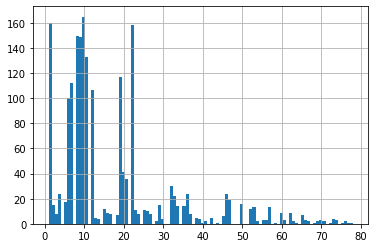

In [22]:
df['Toss_winner'].hist(bins=100)

<AxesSubplot:>

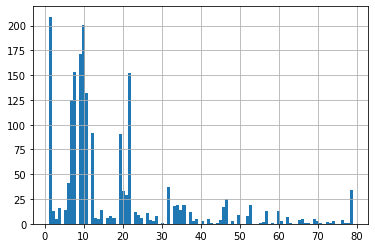

In [23]:
#shows that Mumbai won most matches followed by Chennai
df['Winner'].hist(bins=100)

Text(0.5, 1.0, 'Match winners')

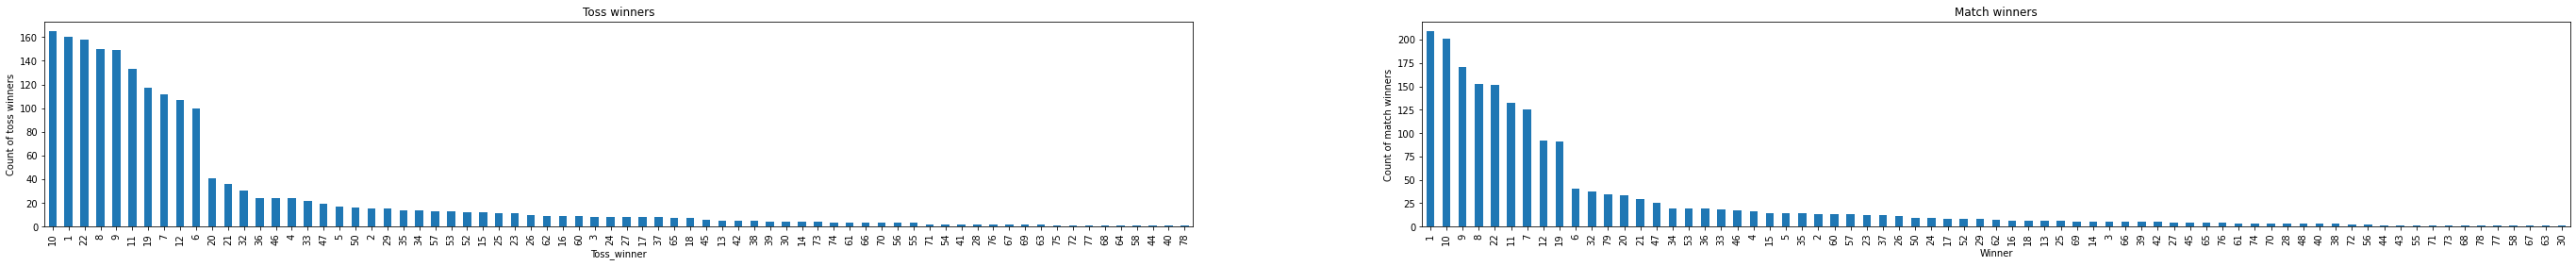

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(48,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("Toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [25]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

Team1            0
Team2            0
City             0
Toss_decision    0
Toss_winner      0
Venue            0
Winner           0
dtype: int64

In [26]:
#Find cities which are null
df[pd.isnull(df['City'])]

,Team1,Team2,City,Toss_decision,Toss_winner,Venue,Winner


In [27]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['City','Toss_decision','Venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,Team1,Team2,City,Toss_decision,Toss_winner,Venue,Winner
0,4,53,4,1,4,210,4
1,5,18,102,1,5,91,18
2,2,18,54,1,18,8,79
3,2,18,54,0,2,8,2
4,6,10,49,1,10,93,10
...,...,...,...,...,...,...,...
1900,20,21,12,1,20,5,21
1901,20,21,12,0,21,5,21
1902,20,21,12,1,21,5,20
1903,2,29,54,1,29,8,2


In [28]:
df.head(10)

,Team1,Team2,City,Toss_decision,Toss_winner,Venue,Winner
0,4,53,4,1,4,210,4
1,5,18,102,1,5,91,18
2,2,18,54,1,18,8,79
3,2,18,54,0,2,8,2
4,6,10,49,1,10,93,10
5,6,10,49,1,10,93,10
6,6,10,49,0,6,93,10
7,3,5,113,0,5,36,3
8,3,5,113,0,3,36,3
9,7,12,35,0,7,92,7


In [29]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

Player = ["Q de Kock","MJ Guptill","Junaid Khan","TA Boult","JE Root","RG Sharma","SR Watson","V Kohli","AB de Villiers","CR Woakes","CH Morris"]


#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

  

In [30]:
#logistic Regression
outcome_var=['Winner']
predictor_var = ['Team1', 'Team2', 'Venue', 'Toss_winner','City','Toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22  1  1 ... 70 23 23]
Accuracy : 20.525%


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
#Gaussian NAive bayes algorithm
from sklearn.naive_bayes import GaussianNB
outcome_var=['Winner']
predictor_var = ['Team1', 'Team2', 'Venue', 'Toss_winner','City','Toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

[ 4  7  1 ... 20 22 22]
Accuracy : 30.709%


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [32]:
#applying knn algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)



[20  5  1 ... 21  2  2]
Accuracy : 62.467%


<ipython-input-29-e6fe732235f8>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(data[predictors],data[outcome])


In [33]:
#Random forest classifier
model = RandomForestClassifier(n_estimators=100)
outcome_var=['Winner']
predictor_var = ['Team1', 'Team2', 'Venue', 'Toss_winner','City','Toss_decision']
classification_model(model, df,predictor_var,outcome_var)

predictor_var=Player
print(predictor_var)

<ipython-input-29-e6fe732235f8>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[ 4 18 79 ... 20  2  2]
Accuracy : 93.648%
['Q de Kock', 'MJ Guptill', 'Junaid Khan', 'TA Boult', 'JE Root', 'RG Sharma', 'SR Watson', 'V Kohli', 'AB de Villiers', 'CR Woakes', 'CH Morris']
